## 3. Data Analyzing

### 3.1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

First, let's read our final data in to dataframe

In [2]:
ds_survey_df = pd.read_csv('../Dataset/final_data.csv')
ds_survey_df.head()

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_1640\121045001.py:1: DtypeWarning: Columns (208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  ds_survey_df = pd.read_csv('../Dataset/final_data.csv')


,Duration (in seconds),Age,Gender,Residential country,Student?,DS Platform (Coursera),DS Platform (edX),DS Platform (Kaggle Learn Courses),DS Platform (DataCamp),DS Platform (Fast.ai),...,Favorite media sources (Reddit),Favorite media sources (Kaggle),Favorite media sources (Course Forums),Favorite media sources (YouTube),Favorite media sources (Podcasts),Favorite media sources (Blogs),Favorite media sources (Journal Publications),Favorite media sources (Slack),Favorite media sources (None),Favorite media sources (Other)
0,121.0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462.0,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293.0,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851.0,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232.0,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### 3.2. Asking Meaningful Questions

#### 3.2.1 First Question

**A possible question is:** Are there any programming languages that are trending among experienced programmers and do participants with more experience tend to use more programming languages?

**Answering this question** will help us to know more the trend of using programming languages. The analysis helps discern if individuals with more experience tend to be proficient in a wider array of languages.

**How we answer this question**: give information about programming languages and programming experiences. Base on those, we'll plot Stacked Bar Chart of Experience Level by Programming Languages.

#### 3.2.1.1 Pre-processing And Analyzing Data

##### Pre-processing

Programming Language

In [3]:
programming_language_df = ds_survey_df.loc[:,'Programming language (Python)':'Programming language (Other)']

programming_language_count = programming_language_df.count()

print("Count of programming languages reported by participants:\n" + programming_language_count.to_string())

Count of programming languages reported by participants:
Programming language (Python)        18653
Programming language (R)              4571
Programming language (SQL)            9620
Programming language (C)              3801
Programming language (C#)             1473
Programming language (C++)            4549
Programming language (Java)           3862
Programming language (JavaScript)     3489
Programming language (Bash)           1674
Programming language (PHP)            1443
Programming language (MATLAB)         2441
Programming language (Julia)           296
Programming language (Go)              322
Programming language (None)            256
Programming language (Other)          1342


Distribution Of Programming Languages

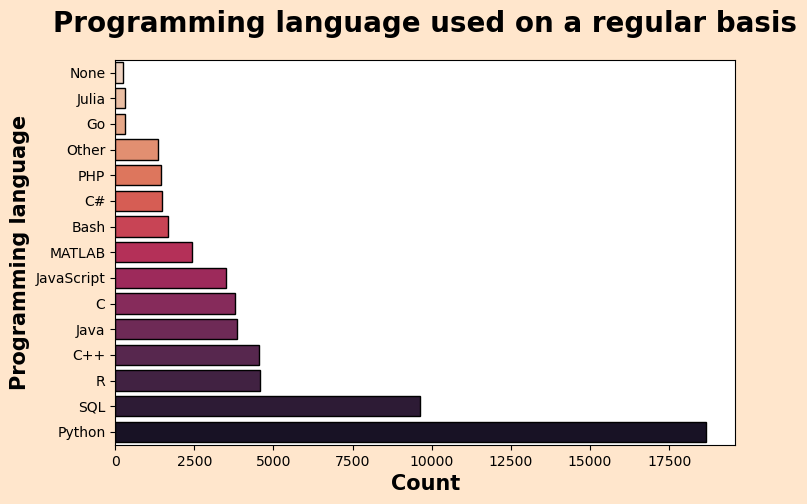

In [4]:
sorted_count = programming_language_count.sort_values(ascending = True)
languge = sorted_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = languge[0], x = sorted_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Programming language used on a regular basis', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Programming language', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

Programming Experience

In [5]:
exp_year_df = ds_survey_df['Programming experience']
count_exp_year_df = exp_year_df.value_counts()


Distribution Of Programming Experience

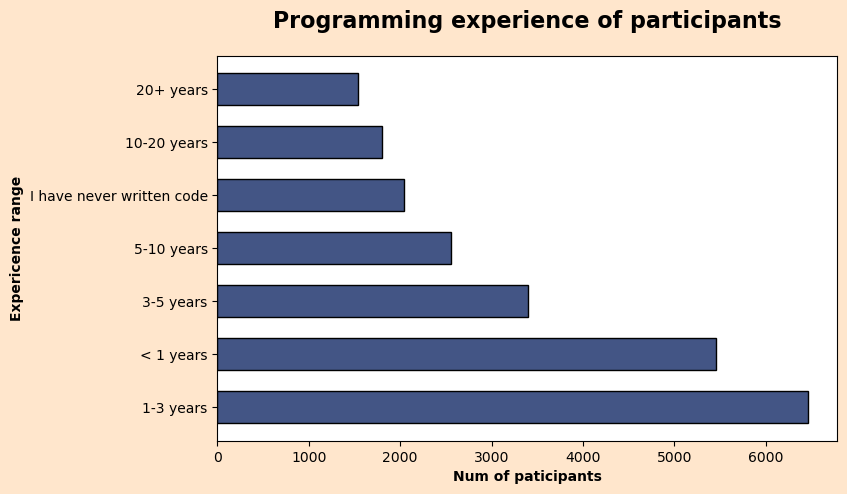

In [6]:
count_exp_year_df.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_exp_year_df.keys(), count_exp_year_df, edgecolor = 'black', color = '#435585', height = 0.6)
plt.xlabel('Num of paticipants', fontweight = 'bold')
plt.ylabel('Expericence range', fontweight = 'bold')
plt.title('Programming experience of participants', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

Like you see we should encode the "Programming Experiece" categories into seperate columns for better analysis. This will allow you to directly see the correlation between reported proficiency in each programming language and each specific category of programming experience.

In [7]:
exp_year_df = pd.get_dummies(exp_year_df)

print("Count of programming experience reported by participants:\n" + count_exp_year_df.to_string())

Count of programming experience reported by participants:
1-3 years                    6459
< 1 years                    5454
3-5 years                    3399
5-10 years                   2556
I have never written code    2037
10-20 years                  1801
20+ years                    1537


##### Analysis

Converting programming language variables to numerical counts

In [8]:
programming_language_df = programming_language_df.applymap(lambda x: 1 if pd.notnull(x) else 0)

We can make the DataFrame to include only the relevant rows and columns in the order I want.

In [9]:
language_order = [
    'Programming language (Python)',
    'Programming language (R)',
    'Programming language (SQL)',
    'Programming language (C)',
    'Programming language (C#)',
    'Programming language (C++)',
    'Programming language (Java)',
    'Programming language (JavaScript)',
    'Programming language (Bash)',
    'Programming language (PHP)',
    'Programming language (MATLAB)',
    'Programming language (Julia)',
    'Programming language (Go)',
    'Programming language (None)',
    'Programming language (Other)'
]

# experience_order = [
#     '1-3 years',
#     '< 1 years',
#     '3-5 years',
#     '5-10 years',
#     'I have never written code',
#     '10-20 years',
#     '20+ years'
# ]

experience_order = [
    '< 1 years',
    '1-3 years',
    '3-5 years',
    '5-10 years',
    '10-20 years',
    '20+ years'
]

exp_year_df = exp_year_df[experience_order].reindex(columns=experience_order)


For those in the column **I have never written code**, we will not need to draw on the plot and leave their default value as 0. Because someone who has never written code cannot have programming experience.

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_1640\1750524047.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_cycle = cycle(plt.cm.get_cmap('tab20', len(language_order)).colors)


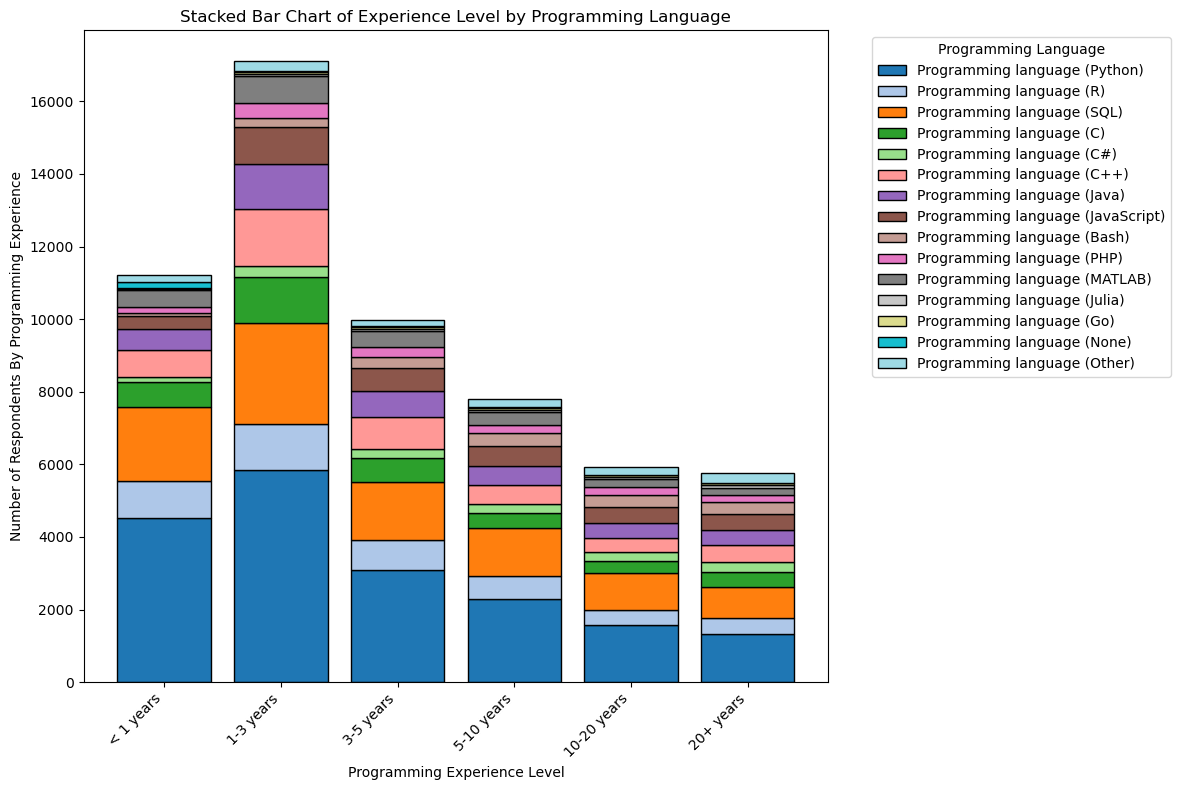

In [11]:
# Create a stacked bar chart with diverse colors and black edges for each language
plt.figure(figsize=(12, 8))
bottoms = None

# Define a diverse color cycle using itertools.cycle
color_cycle = cycle(plt.cm.get_cmap('tab20', len(language_order)).colors)

# Dictionary to store counts for each language
language_counts_by_year = {}

for language in language_order:
    counts = exp_year_df.mul(programming_language_df[language], axis=0).sum()
    language_counts_by_year[language] = counts
    color = next(color_cycle)
    plt.bar(experience_order, counts, label=f'{language}', bottom=bottoms, color=color, edgecolor='black')

    if bottoms is None:
        bottoms = counts
    else:
        bottoms += counts

plt.xlabel('Programming Experience Level')
plt.ylabel('Number of Respondents By Programming Experience')
plt.title('Stacked Bar Chart of Experience Level by Programming Language')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Answer The Question
- In the span of **<1 year** to **1-3 years**, the number of people using programming languages increased significantly, the languages used that contributed greatly to that growth were **Python, SQL, C++**...

- **Python and SQL** stands out as the most popular language for both beginners and experienced individuals, reflecting a general trend in the programming community.

- It is difficult to say whether there is a trend for more experienced programmers to use more languages because almost all programming languages appear in all bars in the plot.

**Overall**: Python and SQL are the two most used languages and are also the trends of programmers at different experience levels, not just experienced programmers.

### 3.2.2 Second Question

**A possible question is:** So for people who have never coded, what career do they have in data science? Consider these people's degrees and fields of study. Are there any differences in educational level and field of study compared to others? Which platform do they use?

**Answering this question**: will help us know more about careers, degrees and research publication and platforms of people who have never coded.

**How we answer this question**: plotting to see clearly distribution.

So for people who have never coded, what career do they have in data science?

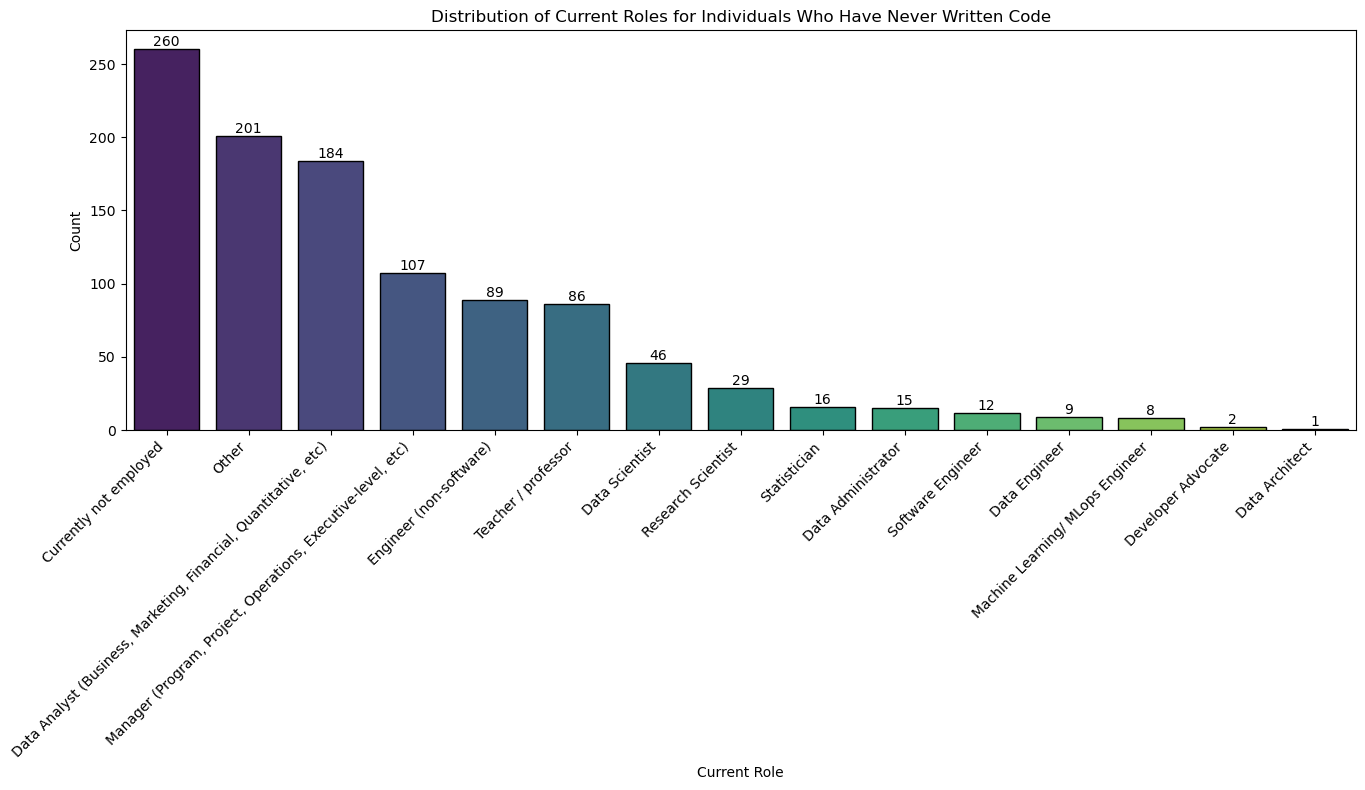

Currently not employed                                              260
Other                                                               201
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    184
Manager (Program, Project, Operations, Executive-level, etc)        107
Engineer (non-software)                                              89
Teacher / professor                                                  86
Data Scientist                                                       46
Research Scientist                                                   29
Statistician                                                         16
Data Administrator                                                   15
Software Engineer                                                    12
Data Engineer                                                         9
Machine Learning/ MLops Engineer                                      8
Developer Advocate                                              

In [39]:
exp_year_df = ds_survey_df['Programming experience']

exp_year_df = pd.get_dummies(exp_year_df)

# Merge the two dataframes on the index
merged_df = pd.merge(ds_survey_df, exp_year_df[['I have never written code']], left_index=True, right_index=True)

# Filter respondents who have never written code
non_coders_df = merged_df[merged_df['I have never written code'] == 1]

# Analyze the careers of individuals who have never written code
career_analysis = non_coders_df['Current role'].value_counts()

# Plot the distribution of current roles for individuals who have never written code using seaborn
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=career_analysis.index, y=career_analysis, palette='viridis', edgecolor='black')

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Distribution of Current Roles for Individuals Who Have Never Written Code')
plt.xlabel('Current Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

career_analysis

- Most of participants who have never written code is currently not employed (260).

- There are still some roles where the number of people who have never coded is quite high such as: Manager(107), Data Analyst(184), Other(201).

- There are roles that have very few participants such as: Data Architect(1), Developer Advocate(2), Machine Learning/ MLops Engineer(8), Data Engineer(9)...

Are there any differences in educational level and field of study compared to others?

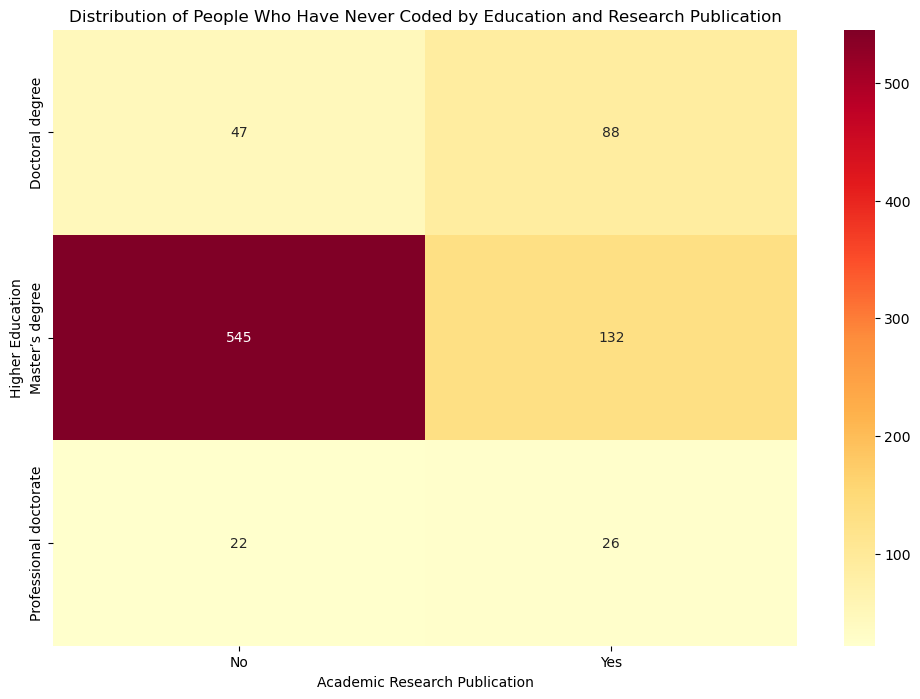

Academic research publication?,No,Yes
Higher education?,,
Doctoral degree,47,88
Master’s degree,545,132
Professional doctorate,22,26


In [26]:
degree_field_distribution = merged_df[merged_df['I have never written code'] == 1].groupby(['Higher education?', 'Academic research publication?'])['I have never written code'].count().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(degree_field_distribution, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Distribution of People Who Have Never Coded by Education and Research Publication')
plt.xlabel('Academic Research Publication')
plt.ylabel('Higher Education')
plt.show()

degree_field_distribution

- **Doctoral degree**: There are 47 people who have not published academic research and 88 people who have published. In this group, there is a significant number of people who have published academic research.

- **Master's degree**: There were 545 people who did not publish academic research and 132 people who did. Although the number of people publishing in this group is not too large, 132 is still an impressive number

- **Professional doctorate**: There are 22 people who have not published academic research and 26 people who have published. The number who have or have not published is quite low.

- **Overall**: among individuals who have never written code, having an academic research publication does not seem to be a prevalent factor in obtaining a higher education degree. While a significant number do not have publications, there are still individuals with publications at each education level.


Which platform do they use?

In [34]:
never_coded_df = merged_df[merged_df['I have never written code'] == 1]

platforms = never_coded_df.filter(like='DS Platform')

platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 46 to 23976
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   DS Platform (Coursera)                      570 non-null    object
 1   DS Platform (edX)                           106 non-null    object
 2   DS Platform (Kaggle Learn Courses)          328 non-null    object
 3   DS Platform (DataCamp)                      157 non-null    object
 4   DS Platform (Fast.ai)                       31 non-null     object
 5   DS Platform (Udacity)                       64 non-null     object
 6   DS Platform (Udemy)                         260 non-null    object
 7   DS Platform (LinkedIn Learning)             167 non-null    object
 8   DS Platform (Cloud-certification programs)  80 non-null     object
 9   DS Platform (University Courses)            292 non-null    object
 10  DS Platform (None)    

We don't need to plot **DS Platform (None)**, it will confuse the information we infer

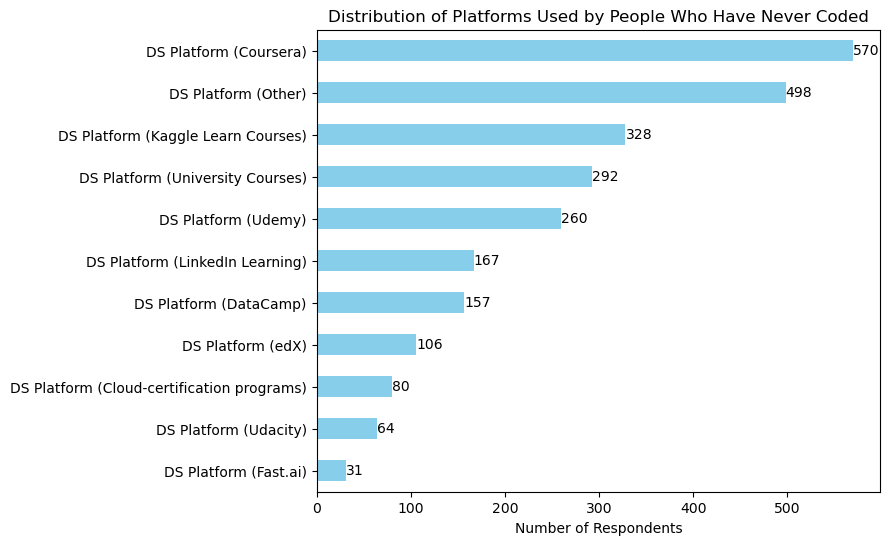

DS Platform (Coursera)                        570
DS Platform (Other)                           498
DS Platform (Kaggle Learn Courses)            328
DS Platform (University Courses)              292
DS Platform (Udemy)                           260
DS Platform (LinkedIn Learning)               167
DS Platform (DataCamp)                        157
DS Platform (edX)                             106
DS Platform (Cloud-certification programs)     80
DS Platform (Udacity)                          64
DS Platform (Fast.ai)                          31
dtype: int64

In [38]:
# Drop 'DS Platform (None)'
platform_counts = never_coded_df.filter(like='DS Platform').drop('DS Platform (None)', axis=1).count().sort_values(ascending = False)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
platform_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Platforms Used by People Who Have Never Coded')

# Add numbers at the end of each bar
for index, value in enumerate(platform_counts.sort_values()):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xlabel('Number of Respondents')
plt.show()

platform_counts

**Platform Preferences of Non-Coders**

- **Coursera Dominance:** Coursera is the preferred platform for non-coders, with 570 respondents, indicating its popularity for entry-level learners.

- **Diversity in Learning:** Beyond Coursera, respondents also utilize diverse platforms. "Other" platforms have a significant count of 498, suggesting exploration of lesser-known or specialized resources.

- **Kaggle and Universities:** Kaggle Learn Courses and University Courses rank high, emphasizing the importance of hands-on projects and formal education.

- **Udemy and LinkedIn Learning:** These platforms have a notable presence, showcasing the popularity of on-demand courses and professional development resources.

- **Specialized Learning:** Platforms like Fast.ai, Udacity, and Cloud-certification programs attract a smaller but focused user base, indicating a preference for more specialized or advanced content.

- **Overall**: In summary, the diverse usage of platforms among those who have never written code indicates a mix of self-paced online courses, formal university education, and specialized resources. Coursera stands out as a key player, but learners also explore various avenues to build their skills in data science.

### 3.3 Conclusion

- Through the questions I asked above, we knew about the trend of using programming languages in Data Science and also knew how people who have never written code exist.

- But as we know, to survive in the Data Science industry, not knowing how to code is a pretty big shortcoming.

- As far as I know, they can still work related to Data Science for the following reasons:

1. **Diverse Roles:** The list includes a wide range of roles, from data analysis and management to teaching and research. These roles often require domain-specific knowledge, and coding might not be a primary skill for some of them.

2. **Non-Technical Roles:** Many roles, such as managerial positions, teaching, or advocacy, may not heavily rely on coding skills. Professionals in these roles often focus on decision-making, strategy, communication, and other skills that are essential but not coding-dependent.

3. **Domain Expertise:** Certain careers, like Data Analyst or Statistician, rely more on statistical and analytical skills rather than coding. Individuals with deep domain expertise may not need to code extensively but can still contribute significantly to their fields.

4. **Specialized Roles:** Some roles, such as Developer Advocate or Data Architect, might involve coding but may not be the primary focus. These professionals often work on higher-level strategies, design, and communication rather than extensive coding tasks.

5. **Evolution of Roles:** The field of data science is evolving, and newer roles like MLops Engineer or Data Scientist may have emerged relatively recently. Individuals in these roles might not have a traditional coding background but possess skills relevant to their specific responsibilities.

- In summary, the diverse career paths for people who have never coded reflect the multidimensional nature of the data science field, encompassing both technical and non-technical roles. Different roles require different skill sets, and coding is just one aspect of the broader skill landscape in data-related professions.